**Library Importation**

In [1]:
# Importing required libraries for conducting the analysis
# Importing standard libraries
import pandas as pd               # library for data manipulation and analysis
import numpy as np                # library for performin scientific computations
import matplotlib.pyplot as plt   # library for creating basic visualisations
import seaborn as sns             # library for creating rich data visualisations

# telling notebook environment to plot any figures in here as opposed to saving in file
%matplotlib inline   

# sets the visuals to be more appealing to the eye that the generic sns
sns.set() 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Loading the Dataset**

In [2]:
# Loading the dataset
df = pd.read_csv("dataset.csv")

# previewing the dataframe
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


**Dataset Exploration**

In [3]:
# determining the shape (size) of the dataset 
df.shape

(1000, 11)

**Observation:** The original dataset has 1000 observations and 10 variables

In [4]:
# Obtaining a statistical summary of numerical variables
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


**Observation:** Looking at the count, the dataset has no missing data. As well, looking at the mean, the magnitude of the dataset is not the same.

In [5]:
# checking the data types: Object = string, int64 = integers
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

**Observation:** The dataset has both strings and integers. 

In [6]:
# dropping 'Unnamed: 0' variable: 
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
# Viewing the ne dataset
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


**Observation:** The dataset has the unnamed variable dropped.

In [8]:
# getting the unique values of each variable
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: Age
Number of unique values: 53
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]

Variable: Sex
Number of unique values: 2
['male' 'female']

Variable: Job
Number of unique values: 4
[2 1 3 0]

Variable: Housing
Number of unique values: 3
['own' 'free' 'rent']

Variable: Saving accounts
Number of unique values: 4
[nan 'little' 'quite rich' 'rich' 'moderate']

Variable: Checking account
Number of unique values: 3
['little' 'moderate' nan 'rich']

Variable: Credit amount
Number of unique values: 921
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  

**Observation:** 

*   Unique values are displayed above for each variable.

*   The savings and checking account variables have a nan unique value. This indicates that there are missing values.

In [9]:
# check for missing values
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

# check for missing values
df.isna().sum()

**Observation:** 

*   missing values exist in the Savings accounts and Checking account variables.
*   From the dataset, we can infer that the missing values are as a result of having persons who took credit from the bank but didn't have a savings accounts or checking account. 
*   Thus, we will save these missing values as "NoSavingAccount" and "NoCheckingAccount".

In [10]:
# dealing with missing values
df["Saving accounts"].fillna('NoSavingAcc', inplace= True)
df["Checking account"].fillna('NoCheckAcc', inplace= True)

In [11]:
# Re-checking for missing values
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

**Observation:** All missing values in the dataset have been imputed.

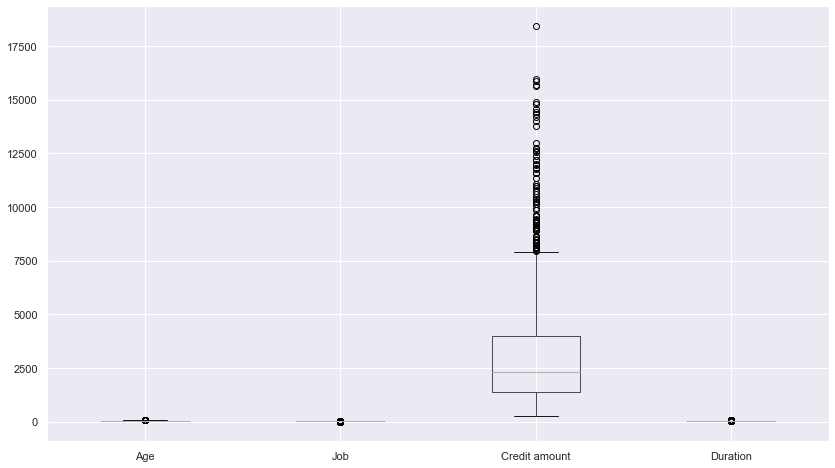

In [12]:
# checking for outliers
plt.figure(figsize = (14, 8))
df.boxplot()
plt.show()

**Observation:** Credit amount variable has outliers.


In [13]:
# standardizing variable names for readability
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'risk'],
      dtype='object')

**Observation:** All variable names have now been standardized.

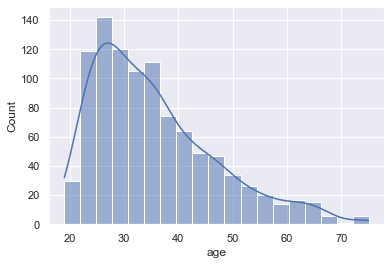

In [14]:
# univariate analysis: age variable
sns.histplot(df["age"],kde="True");

**Observation:** The 'age' variable is not normally distributed. It is skewed to the right.



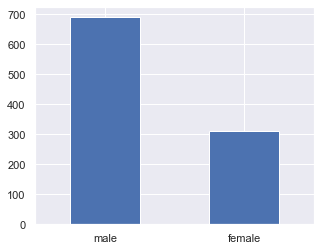

In [15]:
# univariate analysis: sex variable
plt.figure(figsize = (5, 4))
df.sex.value_counts().plot(kind = 'bar', rot = 0);

**Observation:** There are more males than females

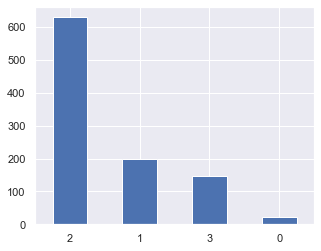

In [16]:
# univariate analysis: job variable
plt.figure(figsize = (5, 4))
df.job.value_counts().plot(kind = 'bar', rot = 0);

**Observation:** Job category 2 has the highest count of people whereas 0 has the least number of people.

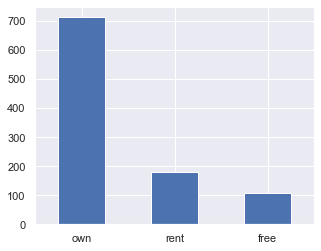

In [17]:
# univariate analysis: housing variable
plt.figure(figsize = (5, 4))
df.housing.value_counts().plot(kind = 'bar', rot = 0);

**Observation:** Majority of people own their own houses, followed at a distant 2nd by those who rent the houses they live in while those who live for free in the houses are the least.

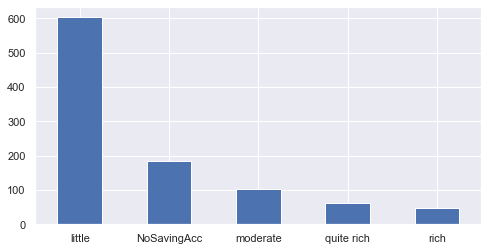

In [18]:
# univariate analysis: savings_account variable
plt.figure(figsize = (8, 4))
df.saving_accounts.value_counts().plot(kind = 'bar', rot = 0);

**Observation:**

*   Majority of people have little savings. There is also a vast difference between the number of people who have little savings and the rich (who are the least number of people).
*   Several people have no savings account.
*   Moderate and quite rich individuals fall below 100 people.




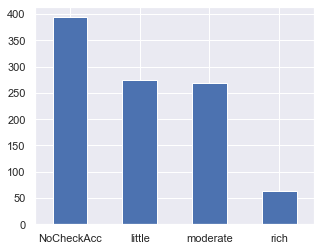

In [19]:
# univariate analysis: checking_account variable
plt.figure(figsize = (5, 4))
df.checking_account.value_counts().plot(kind = 'bar', rot = 0);

**Observation:** 

*   No checking accounts are the majority.
*   little and moderate categories in checking accounts are almost equal.
*   The rich have the least number of checking accounts.



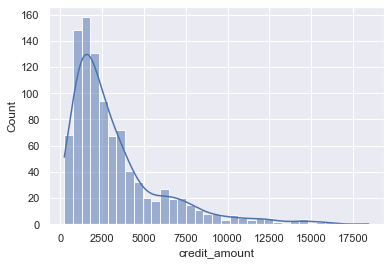

In [20]:
# univariate analysis: credit_amount variable
sns.histplot(df.credit_amount,kde="True");

**Observation:** 

*   Majority of the credit falls under the 5k amount.
*   credit_amount variable is not normally distributed. It's skewed more to the right.



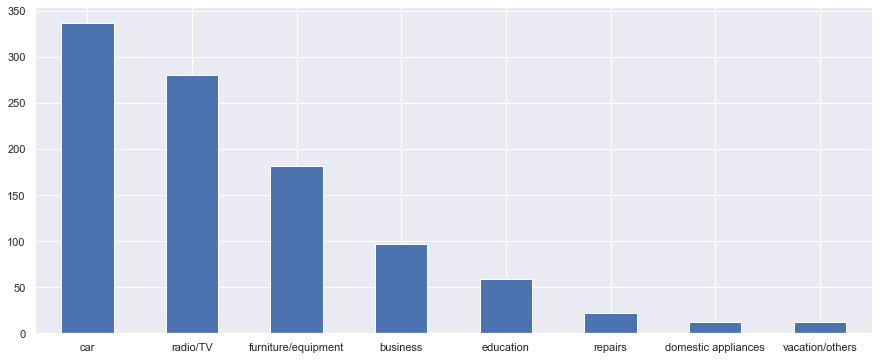

In [21]:
# univariate analysis: purpose variable
plt.figure(figsize = (15, 6))
df.purpose.value_counts().plot(kind = 'bar', rot = 0);

**Observation:** Purpose for credit is mostly for car purchases with the least reason being credit for vacations.

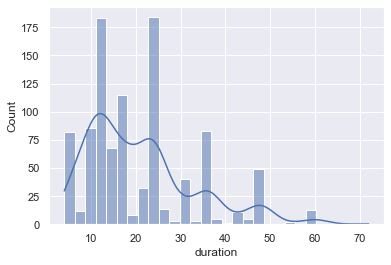

In [22]:
# univariate analysis: duration variable
sns.histplot(df.duration,kde="True"); 

**Observation:** Duration variable is skewed more to the right. It fails to be normally distributed. 

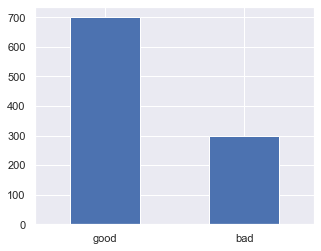

In [23]:
# univariate analysis: purpose variable
plt.figure(figsize = (5, 4))
df.risk.value_counts().plot(kind = 'bar', rot = 0);

**Observation:** Majority of the risk cases are good as compared to the bad risk.

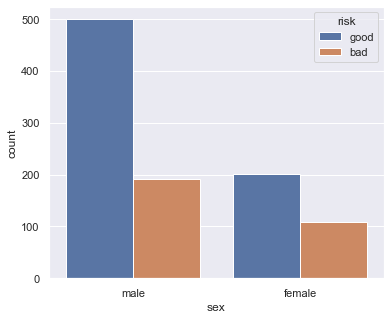

In [24]:
# Bivariate analysis:  relationship between our target variable 'risk' and the other variables.
# bivariate analysis: risk by sex variables
plt.figure(figsize = (6, 5))
sns.countplot(x='sex', hue = 'risk', data = df)
plt.show()

**Observation:** 

*   More males than females are categorized as good risks.



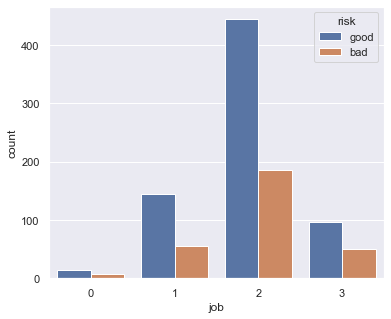

In [25]:
# bivariate analysis: risk by job variable
plt.figure(figsize = (6, 5))
sns.countplot(x='job', hue = 'risk', data = df);

**Observation:** Job category 2 have the highest rating of good risk, whereas job category 0 has the least number of good and bad risk.

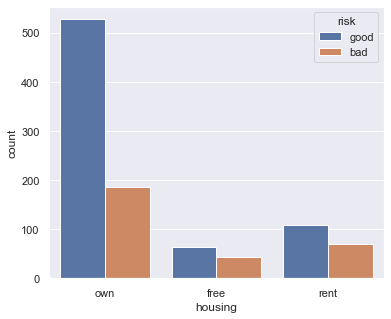

In [26]:
# bivariate analysis: risk by housing variables
plt.figure(figsize = (6, 5))
sns.countplot(x='housing', hue = 'risk', data = df);

**Observation:** Majority of home owners are categorised as good risk, followed by those who rent. 

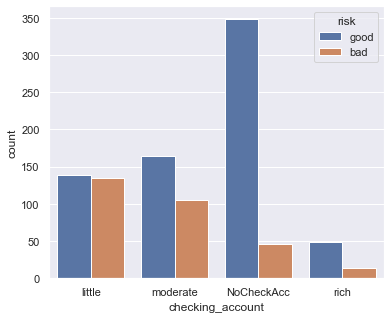

In [27]:
# risk by checking_account variables
plt.figure(figsize = (6, 5))
sns.countplot(x='checking_account', hue = 'risk', data = df);

**Observation:** 
*   Those with no checking accounts seem to have the highest good risk category. 
*   Those under the litle category in the checking account have an almost similar risk comparity.
*   The rich who have checking accounts have a good risk category.

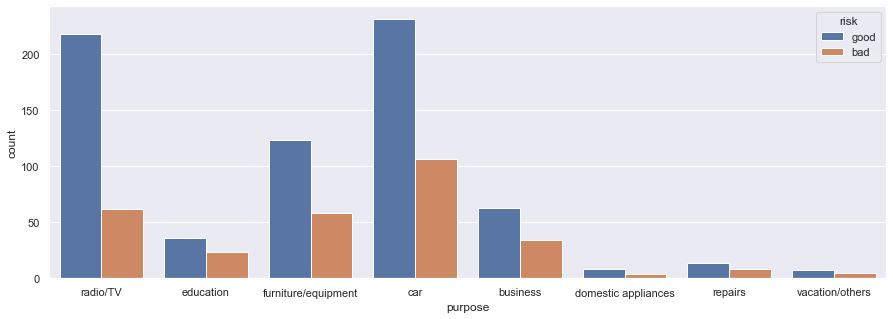

In [28]:
# risk by purpose variables
plt.figure(figsize = (15, 5))
sns.countplot(x='purpose', hue = 'risk', data = df);

**observation:** Those whose purpose of credit falls under car and radio have the highest rating of good risk.

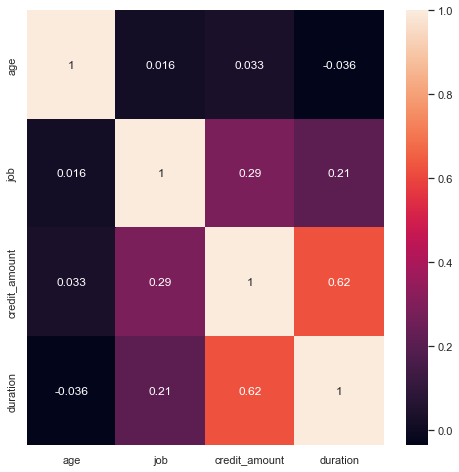

In [29]:
# heatmap to visualise features with linear relationships 
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot=True, );

**Observation:** The variables duration and credit amount are strongly correlated. 

**Data Preparation**

Our target variable (risk variable) needs to be binarized. Labels are as follows: 0: Bad 1: Good. 

In [30]:
# LabelBinarizer converts the string categorical variable to binary 
from sklearn.preprocessing import LabelBinarizer
lb= LabelBinarizer()
df["risk"]= lb.fit_transform(df["risk"])

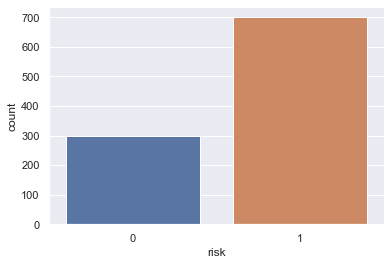

In [31]:
# plotting risk distribution to understand whether there are more records 
# with more categories than the other.
sns.countplot(x='risk', data = df);

**Observation:** We have an imbalanced dataset. This is to be sorted in sections below.

In [32]:
# performing binning on duration numeric variable
# we bin by specifying 6 bins
df["duration"] = pd.qcut(df.duration, q = 6)

In [33]:
# performing binning on age numeric variable
# we bin by defining the intervals and categories
interval = (18, 25, 35, 60, 120)
categories = ['student', 'youth', 'adult', 'senior']
df["age"] = pd.cut(df.age, interval, labels = categories)

In [34]:
# performing binning on credit_amount numeric variable
# this time we bin without specifying i.e. we create 6 bins
df["credit_amount"] = pd.qcut(df.credit_amount, q = 5)

In [35]:
# performing one hot encoding to the job categorical variable
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)


In [36]:
# performing one hot encoding to the purpose categorical variable
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)


In [37]:
# performing one hot encoding to the sex variable
df = df.merge(pd.get_dummies(df.sex, drop_first=True, prefix='sex'), left_index=True, right_index=True)

In [38]:
# performing one hot encoding to the housing variable
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)


In [39]:
# performing one hot encoding to the savings account variable
df = df.merge(pd.get_dummies(df.saving_accounts, drop_first=True, prefix='savings'), left_index=True, right_index=True)


In [40]:
# performing one hot encoding to checking account variable
df = df.merge(pd.get_dummies(df.checking_account, drop_first=True, prefix='check'), left_index=True, right_index=True)


In [41]:
# performing one hot encoding to age variable
df = df.merge(pd.get_dummies(df.age, drop_first=True, prefix='age'), left_index=True, right_index=True)

In [42]:
# performing one hot encoding to duration variable
df = df.merge(pd.get_dummies(df.duration, drop_first=True, prefix='duration'), left_index=True, right_index=True)

In [43]:
# performing one hot encoding to credit amount variable
df = df.merge(pd.get_dummies(df.credit_amount, drop_first=True, prefix='credit_amount'), left_index=True, right_index=True)

In [44]:
# previewing the new created variables
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk,...,age_senior,"duration_(10.0, 12.0]","duration_(12.0, 18.0]","duration_(18.0, 24.0]","duration_(24.0, 36.0]","duration_(36.0, 72.0]","credit_amount_(1262.0, 1906.8]","credit_amount_(1906.8, 2852.4]","credit_amount_(2852.4, 4720.0]","credit_amount_(4720.0, 18424.0]"
0,senior,male,2,own,NoSavingAcc,little,"(249.999, 1262.0]","(3.999, 10.0]",radio/TV,1,...,1,0,0,0,0,0,0,0,0,0
1,student,female,2,own,little,moderate,"(4720.0, 18424.0]","(36.0, 72.0]",radio/TV,0,...,0,0,0,0,0,1,0,0,0,1
2,adult,male,1,own,little,NoCheckAcc,"(1906.8, 2852.4]","(10.0, 12.0]",education,1,...,0,1,0,0,0,0,0,1,0,0
3,adult,male,2,free,little,little,"(4720.0, 18424.0]","(36.0, 72.0]",furniture/equipment,1,...,0,0,0,0,0,1,0,0,0,1
4,adult,male,2,free,little,little,"(4720.0, 18424.0]","(18.0, 24.0]",car,0,...,0,0,0,1,0,0,0,0,0,1


In [45]:
# Excluding the columns that have been used to derive new new variables
del df["job"]
del df["purpose"]
del df["sex"]
del df["housing"]
del df["saving_accounts"]
del df["checking_account"]
del df["age"]
del df["duration"]
del df["credit_amount"]

In [46]:
# preview updated dataframe
df.head()

,risk,job_1,job_2,job_3,purpose_car,purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/TV,purpose_repairs,...,age_senior,"duration_(10.0, 12.0]","duration_(12.0, 18.0]","duration_(18.0, 24.0]","duration_(24.0, 36.0]","duration_(36.0, 72.0]","credit_amount_(1262.0, 1906.8]","credit_amount_(1906.8, 2852.4]","credit_amount_(2852.4, 4720.0]","credit_amount_(4720.0, 18424.0]"
0,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [47]:
# dividing our dataset into features (X) and target (y)
X = df.drop(columns = ['risk']).values
y = df['risk'].values

print(X.shape)
print(y.shape)

(1000, 32)
(1000,)


**Observation:** All independent variables have been saved in the variable X whereas the dependant variable, risk, has been saved in variable y.

In [48]:
# splitting our dataset into 80-20 train-test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [50]:
# Using SMOTE to balance our target variable.
# This technique works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. 
# The synthetic points are added between the chosen point and its neighbors.

# creating a balanced dataset
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

In [51]:
# Checking the amount of records in each category
np.bincount(y_train)

array([240, 560], dtype=int64)

**Observation:** The minority class has been increased to the total number of majority class.

**Data Modelling**

In [52]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()

# training our model
logistic_classifier.fit(X_train, y_train)

# making predictions
y_pred_logistic = logistic_classifier.predict(X_test)

In [53]:
# Logistic Regression Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_pred_logistic, y_test))
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

0.74
[[ 24  36]
 [ 16 124]]
              precision    recall  f1-score   support

           0       0.60      0.40      0.48        60
           1       0.78      0.89      0.83       140

    accuracy                           0.74       200
   macro avg       0.69      0.64      0.65       200
weighted avg       0.72      0.74      0.72       200



**Observation:** 

Logistic Regression accuracy is 73.5%

From our confusion matrix, we can see that we 118 records with the class 1 were predicted correctly, however 31 records with the class 1 were incorrectly predicted. 29 records with the class 0 were predicted correctly while 22 records were predicted incorrectly.

From our classification report, we can see that we have a recall of 0.66 which is our true positive rate

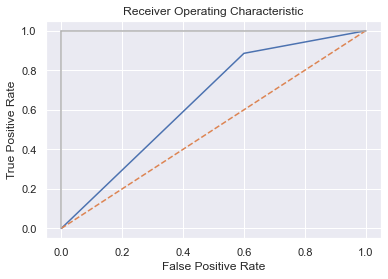

In [54]:
# Exploring roc metric 

# plotting roc curve (receiving operating characteristic curve)
from sklearn.metrics import roc_curve, roc_auc_score

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_logistic)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

This type of curve shows the true positive and false positive rate for every probability threshold of a binary classifier. The higher the blue line, the better the model at distinguishing between the positive and negative classes.

In [55]:
# roc_auc_score
roc_auc_score(y_test, y_pred_logistic)

0.6428571428571428

**Observation:** The roc auc score is 0.66. The closer the score to 1, the better the model is.

In [56]:
# Decision Tree, Random Forest and Gradient Boosting models

# importing our machine learning algorithms  
from sklearn.tree import DecisionTreeClassifier    
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# instantiating our algorithms
decision_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()
gbm_classifier = GradientBoostingClassifier()

# training our models
decision_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)
gbm_classifier.fit(X_train, y_train)

# making predictions
decision_y_prediction = decision_classifier.predict(X_test) 
random_forest_y_pred = random_forest_classifier.predict(X_test)
gbm_y_pred = gbm_classifier.predict(X_test)

# evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
print('Decision Tree')
print(accuracy_score(decision_y_prediction, y_test))
print(confusion_matrix(decision_y_prediction, y_test))
print(classification_report(decision_y_prediction, y_test))
print(roc_auc_score(decision_y_prediction, y_test))

print('Random Forest')
print(accuracy_score(random_forest_y_pred, y_test))
print(confusion_matrix(random_forest_y_pred, y_test))
print(classification_report(random_forest_y_pred, y_test))
print(roc_auc_score(random_forest_y_pred, y_test))

print('Gradient Boosting')
print(accuracy_score(gbm_y_pred, y_test))
print(confusion_matrix(gbm_y_pred, y_test))
print(classification_report(gbm_y_pred, y_test))
print(roc_auc_score(gbm_y_pred, y_test))

Decision Tree
0.675
[[ 31  36]
 [ 29 104]]
              precision    recall  f1-score   support

           0       0.52      0.46      0.49        67
           1       0.74      0.78      0.76       133

    accuracy                           0.68       200
   macro avg       0.63      0.62      0.63       200
weighted avg       0.67      0.68      0.67       200

0.6223207271911121
Random Forest
0.73
[[ 23  17]
 [ 37 123]]
              precision    recall  f1-score   support

           0       0.38      0.57      0.46        40
           1       0.88      0.77      0.82       160

    accuracy                           0.73       200
   macro avg       0.63      0.67      0.64       200
weighted avg       0.78      0.73      0.75       200

0.671875
Gradient Boosting
0.715
[[ 20  17]
 [ 40 123]]
              precision    recall  f1-score   support

           0       0.33      0.54      0.41        37
           1       0.88      0.75      0.81       163

    accuracy          

**Observation:** 

*   The Recall score for the random forest model is slightly higher than that of the logistic regression model. However, the random forest model was not better at predicting true negatives. 

*   The logistic regression classifier  outperformed other models even without any optimisation done.